**INTRODUCTION**

The topic taken for this final project is Classification, in which I've chosen the dataset titanic from kaggle. This dataset is split into two groups, training set and test set. The training dataset contains 891 rows and 12 columns. The columns in the training set are as follows : PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked. The test set contains 417 rows and 11 columns, with the columns are identical to the training one minus the Survived columns.

In this project, we will train a model with machine learning with the training set to determine the survival rate of the passengers on the test set. 

Please download the dataset train.csv and test.csv from : https://www.kaggle.com/competitions/titanic/data

In [41]:
#Import all the needed library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [42]:
#Load the data
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

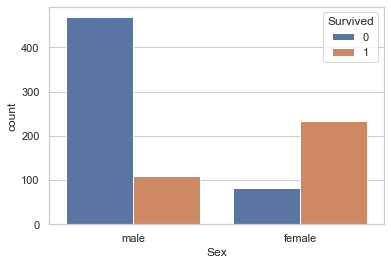

In [43]:
#Data visualization
#Visualize the survival rate of each gender
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Sex", hue = 'Survived', data=data_train)

**Data Preprocessing**

In [44]:
#We will choose the features for the modelling as follows :
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]

#Check if there's any null cell
print(data_train[features].isnull().sum(), '\n')

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64 



In [45]:
#Fill the null cells
data_train['Age'].fillna(data_train['Age'].mean(), inplace=True)
data_train.Embarked.fillna(data_train.Embarked.mode()[0], inplace=True)

print(data_train[features].isnull().sum(), '\n')

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64 



In [46]:
#We will categorize the age into 6 age ranges : infant and children, teens, young adults, adults, and elderly
bins = [0,13,18,25,35,50,100]
labels=[0,1,2,3,4,5]
data_train['Age'] = pd.cut(data_train['Age'], bins=bins, labels=labels, include_lowest=True)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,4,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,8.0500,NaN,S


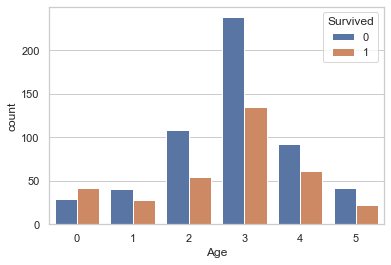

In [47]:
#Now we can see the survival rate of each age group
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Age", hue = 'Survived', data=data_train)

We can see that for infants and children, there's a higher chance of survival. The largest age group (young adults), has a low survival rate, with a ratio of around 2:3 of survival

In [48]:
#We will encode the data so we can start modelling the algorithm
X = data_train[features]
y = data_train['Survived']

X = pd.get_dummies(X)
data_train = pd.get_dummies(data_train)

In [49]:
#To start with, we will split the training data into two to train the model and validate the accuracy of the model
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.25)

In [50]:
#We will test all types of modelling for the training set to find the most suitable one for the testing data
#1. Logistic Regression
model = LogisticRegression(C=10.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_cv)

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
y1_pred = dt.predict(X_cv)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y2_pred = rf.predict(X_cv)

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y3_pred = svm_model.predict(X_cv)

nb = GaussianNB()
nb.fit(X_train, y_train)
y4_pred = nb.predict(X_cv)

kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)
y5_pred = kNN.predict(X_cv)

In [51]:
#Print the accuracies for each models and the confusion matrix
print("The accuracy for Logistic Regression model is: ", accuracy_score(y_cv,y_pred))
matrix = confusion_matrix(y_cv, y_pred)
print("The confusion matrix for Logistic Regression model is: ", '\n', matrix)
print('')
print("The accuracy for Decision Tree model is: ", accuracy_score(y_cv,y1_pred))
matrix = confusion_matrix(y_cv, y1_pred)
print("The confusion matrix for Decision Tree model is: ", '\n', matrix)
print('')
print("The accuracy for Random Forest model is: ", accuracy_score(y_cv,y2_pred))
matrix = confusion_matrix(y_cv, y2_pred)
print("The confusion matrix for Random Forest model is: ", '\n', matrix)
print('')
print("The accuracy for SVM model is: ", accuracy_score(y_cv,y3_pred))
matrix = confusion_matrix(y_cv, y3_pred)
print("The confusion matrix for SVM model is: ", '\n', matrix)
print('')
print("The accuracy for Naive Bayes model is: ", accuracy_score(y_cv,y4_pred))
matrix = confusion_matrix(y_cv, y4_pred)
print("The confusion matrix for Naive Bayes model is: ", '\n', matrix)
print('')
print("The accuracy for KNeighbors Classifier model is: ", accuracy_score(y_cv,y5_pred))
matrix = confusion_matrix(y_cv, y5_pred)
print("The confusion matrix for KNeighbors Classifier model is: ", '\n', matrix)

The accuracy for Logistic Regression model is:  0.820627802690583
The confusion matrix for Logistic Regression model is:  
 [[117  19]
 [ 21  66]]

The accuracy for Decision Tree model is:  0.7982062780269058
The confusion matrix for Decision Tree model is:  
 [[123  13]
 [ 32  55]]

The accuracy for Random Forest model is:  0.8161434977578476
The confusion matrix for Random Forest model is:  
 [[125  11]
 [ 30  57]]

The accuracy for SVM model is:  0.8385650224215246
The confusion matrix for SVM model is:  
 [[122  14]
 [ 22  65]]

The accuracy for Naive Bayes model is:  0.8116591928251121
The confusion matrix for Naive Bayes model is:  
 [[112  24]
 [ 18  69]]

The accuracy for KNeighbors Classifier model is:  0.7847533632286996
The confusion matrix for KNeighbors Classifier model is:  
 [[121  15]
 [ 33  54]]


As we can see, the best accuracy gained is from the SVM model. So, we will use Random Forest model to predict the classification of the testing data.

In [52]:
#Model inference
#In this part, we will use the SVM model that we've trained to predict the 
#survival rate of the other passengers in the testing set 

data_test['Age'].fillna(data_test['Age'].mean(), inplace=True)

bins = [0,13,18,25,35,50,100]
labels=[0,1,2,3,4,5]
data_test['Age'] = pd.cut(data_test['Age'], bins=bins, labels=labels, include_lowest=True)
data_test.head()

x_test = data_test[features]
x_test = pd.get_dummies(x_test)
data_test = pd.get_dummies(data_test)

test_passenger_id = pd.DataFrame(data_test['PassengerId'])
test_pred = svm_model.predict(x_test)
test_pred_pd = pd.DataFrame(test_pred)

test_passenger_id['Survived'] = test_pred_pd
test_passenger_id

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


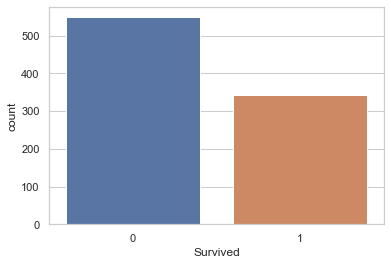

In [53]:
#We can visualize the survival rate of the testing data
ax = sns.countplot(x="Survived", data=data_train)

We can see that based on the trained model, around 550 passengers did not survive and around 330 passengers survived.